<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting - ETH</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Building LSTM Model</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Get Best Parameters for LSTM</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Run the LSTM Model and Get Predictions</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Recursive Predictions</font>](#twentysixth-bullet)<br>   
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_ETH.csv')
df

,Date,ETH-USD_ADJCLOSE,ETH-USD_CLOSE,ETH-USD_HIGH,ETH-USD_LOW,ETH-USD_OPEN,ETH-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,2987.480713,2987.480713,3173.451416,2962.410400,3077.829346,2.078359e+10
1822,2022-04-22,2964.835693,2964.835693,3024.854492,2942.358643,2986.938721,1.678280e+10
1823,2022-04-23,2938.114014,2938.114014,2975.322754,2926.740234,2964.802246,9.116956e+09
1824,2022-04-24,2922.732666,2922.732666,2961.882080,2922.128662,2937.347168,9.696830e+09


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1826 non-null   object 
 1   ETH-USD_ADJCLOSE  1629 non-null   float64
 2   ETH-USD_CLOSE     1629 non-null   float64
 3   ETH-USD_HIGH      1629 non-null   float64
 4   ETH-USD_LOW       1629 non-null   float64
 5   ETH-USD_OPEN      1629 non-null   float64
 6   ETH-USD_VOLUME    1629 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
ETH-USD_ADJCLOSE,197
ETH-USD_CLOSE,197
ETH-USD_HIGH,197
ETH-USD_LOW,197
ETH-USD_OPEN,197
ETH-USD_VOLUME,197


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ETH-USD_ADJCLOSE,1629.0,1.068500e+03,1.254817e+03,8.430830e+01,1.973175e+02,3.938883e+02,1.806972e+03,4.812087e+03
ETH-USD_CLOSE,1629.0,1.068500e+03,1.254817e+03,8.430830e+01,1.973175e+02,3.938883e+02,1.806972e+03,4.812087e+03
ETH-USD_HIGH,1629.0,1.102866e+03,1.293636e+03,8.534274e+01,2.035005e+02,4.063040e+02,1.843819e+03,4.891705e+03
ETH-USD_LOW,1629.0,1.027068e+03,1.209969e+03,8.282989e+01,1.932590e+02,3.812953e+02,1.729642e+03,4.718039e+03
ETH-USD_OPEN,1629.0,1.067100e+03,1.254566e+03,8.427969e+01,1.975370e+02,3.916790e+02,1.804677e+03,4.810071e+03
ETH-USD_VOLUME,1629.0,1.252477e+10,1.114217e+10,6.217330e+08,3.298281e+09,9.766632e+09,1.776813e+10,8.448291e+10


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,ETH-USD_ADJCLOSE,ETH-USD_CLOSE,ETH-USD_HIGH,ETH-USD_LOW,ETH-USD_OPEN,ETH-USD_VOLUME
854,2019-08-28,173.889969,173.889969,187.930878,172.185608,187.495499,6.696604e+09
798,2019-07-03,303.099976,303.099976,303.342041,291.401642,291.764618,9.926712e+09
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
1175,2020-07-14,240.211487,240.211487,242.003784,237.796188,239.975616,7.357459e+09
168,2017-10-11,NaN,NaN,NaN,NaN,NaN,NaN
131,2017-09-04,NaN,NaN,NaN,NaN,NaN,NaN
371,2018-05-02,687.148987,687.148987,688.841980,667.419983,674.075012,2.822270e+09
1359,2021-01-14,1218.453003,1218.453003,1244.163086,1093.060791,1130.231201,3.341092e+10
56,2017-06-21,NaN,NaN,NaN,NaN,NaN,NaN
925,2019-11-07,187.976547,187.976547,191.861099,186.567001,191.504303,9.081248e+09


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,ETH-USD_ADJCLOSE,ETH-USD_CLOSE,ETH-USD_HIGH,ETH-USD_LOW,ETH-USD_OPEN,ETH-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
192,2017-11-04,NaN,NaN,NaN,NaN,NaN,NaN
193,2017-11-05,NaN,NaN,NaN,NaN,NaN,NaN
194,2017-11-06,NaN,NaN,NaN,NaN,NaN,NaN
195,2017-11-07,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,ETH-USD_ADJCLOSE,ETH-USD_CLOSE,ETH-USD_HIGH,ETH-USD_LOW,ETH-USD_OPEN,ETH-USD_VOLUME
0,2017-11-09,320.884003,320.884003,329.451996,307.056000,308.644989,8.932500e+08
1,2017-11-10,299.252991,299.252991,324.717987,294.541992,320.670990,8.859860e+08
2,2017-11-11,314.681000,314.681000,319.453003,298.191986,298.585999,8.423010e+08
3,2017-11-12,307.907990,307.907990,319.153015,298.513000,314.690002,1.613480e+09
4,2017-11-13,316.716003,316.716003,328.415009,307.024994,307.024994,1.041890e+09
...,...,...,...,...,...,...,...
1624,2022-04-21,2987.480713,2987.480713,3173.451416,2962.410400,3077.829346,2.078359e+10
1625,2022-04-22,2964.835693,2964.835693,3024.854492,2942.358643,2986.938721,1.678280e+10
1626,2022-04-23,2938.114014,2938.114014,2975.322754,2926.740234,2964.802246,9.116956e+09
1627,2022-04-24,2922.732666,2922.732666,2961.882080,2922.128662,2937.347168,9.696830e+09


# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,ETH-USD_ADJCLOSE,ETH-USD_CLOSE,ETH-USD_HIGH,ETH-USD_LOW,ETH-USD_OPEN,ETH-USD_VOLUME
0,2017-11-09,320.884003,320.884003,329.451996,307.056000,308.644989,8.932500e+08
1,2017-11-10,299.252991,299.252991,324.717987,294.541992,320.670990,8.859860e+08
2,2017-11-11,314.681000,314.681000,319.453003,298.191986,298.585999,8.423010e+08
3,2017-11-12,307.907990,307.907990,319.153015,298.513000,314.690002,1.613480e+09
4,2017-11-13,316.716003,316.716003,328.415009,307.024994,307.024994,1.041890e+09
...,...,...,...,...,...,...,...
1624,2022-04-21,2987.480713,2987.480713,3173.451416,2962.410400,3077.829346,2.078359e+10
1625,2022-04-22,2964.835693,2964.835693,3024.854492,2942.358643,2986.938721,1.678280e+10
1626,2022-04-23,2938.114014,2938.114014,2975.322754,2926.740234,2964.802246,9.116956e+09
1627,2022-04-24,2922.732666,2922.732666,2961.882080,2922.128662,2937.347168,9.696830e+09


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,ETH-USD_ADJCLOSE,ETH-USD_CLOSE,ETH-USD_HIGH,ETH-USD_LOW,ETH-USD_OPEN,ETH-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2017-11-09,320.884003,320.884003,329.451996,307.056000,308.644989,8.932500e+08,3.814155,7.293782
1,2017-11-10,299.252991,299.252991,324.717987,294.541992,320.670990,8.859860e+08,7.157155,10.245057
2,2017-11-11,314.681000,314.681000,319.453003,298.191986,298.585999,8.423010e+08,5.114704,7.129976
3,2017-11-12,307.907990,307.907990,319.153015,298.513000,314.690002,1.613480e+09,2.202610,6.914277
4,2017-11-13,316.716003,316.716003,328.415009,307.024994,307.024994,1.041890e+09,3.059842,6.966864


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')
    
    return coin_name

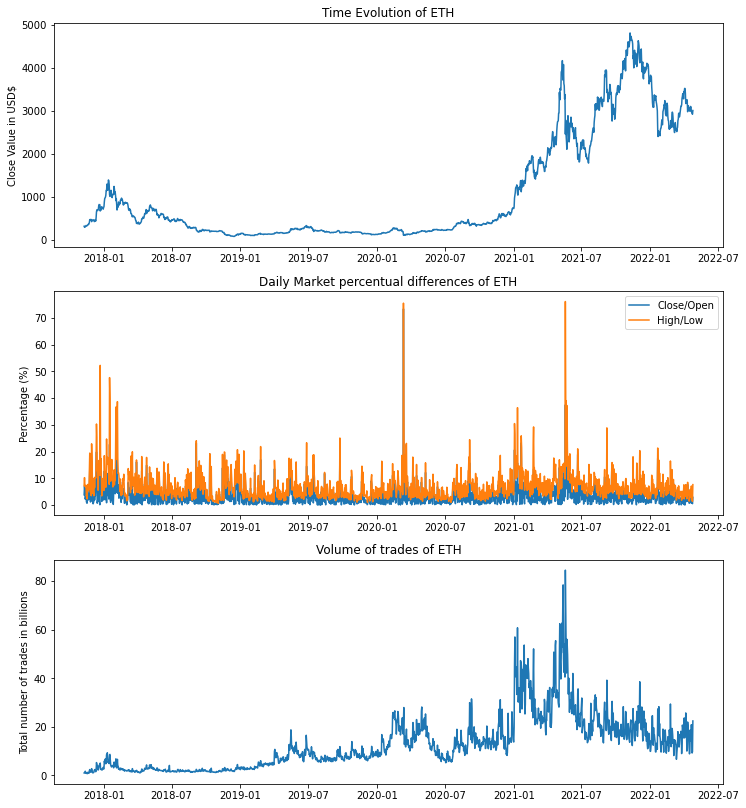

In [13]:
coin_name = plot_coinValue(df)

In [14]:
#FILTER DATASET
df = df.loc[df['Date']>= '2021-01-01']
df

,Date,ETH-USD_ADJCLOSE,ETH-USD_CLOSE,ETH-USD_HIGH,ETH-USD_LOW,ETH-USD_OPEN,ETH-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
1149,2021-01-01,730.367554,730.367554,749.201843,719.792236,737.708374,1.365200e+10,1.005086,4.085847
1150,2021-01-02,774.534973,774.534973,786.798462,718.109497,730.402649,1.974077e+10,5.697912,9.565249
1151,2021-01-03,975.507690,975.507690,1006.565002,771.561646,774.511841,4.520046e+10,20.604230,30.458144
1152,2021-01-04,1040.233032,1040.233032,1153.189209,912.305359,977.058838,5.694599e+10,6.073081,26.403862
1153,2021-01-05,1100.006104,1100.006104,1129.371460,986.811279,1041.498779,4.153593e+10,5.318818,14.446550
...,...,...,...,...,...,...,...,...,...
1624,2022-04-21,2987.480713,2987.480713,3173.451416,2962.410400,3077.829346,2.078359e+10,3.024242,7.123963
1625,2022-04-22,2964.835693,2964.835693,3024.854492,2942.358643,2986.938721,1.678280e+10,0.745506,2.803732
1626,2022-04-23,2938.114014,2938.114014,2975.322754,2926.740234,2964.802246,9.116956e+09,0.908346,1.659953
1627,2022-04-24,2922.732666,2922.732666,2961.882080,2922.128662,2937.347168,9.696830e+09,0.500029,1.360427


# Modelling


## <font color='#5D6D7E'>Building LSTM Model</font> <a class="anchor" id="twentysecond-bullet"></a>
  [Back to TOC](#toc)

## Strategy

Create a DF (windowed_df) where the middle columns will correspond to the close values of X days before the target date and the final column will correspond to the close value of the target date. Use these values for prediction and play with the value of X

In [15]:
def get_windowed_df(X, df):
    start_Date = df['Date'] + pd.Timedelta(days=X)
    
    perm = np.zeros((1,X+1))
    
    #Get labels for DataFrame
    j=1
    labels=[]
    
    while j <= X:
        label = 'closeValue_' + str(j) + 'daysBefore'
        labels.append(label)
        
        j+=1
 
    labels.append('closeValue')
    
    for i in range(X,df.shape[0]):
        temp = np.zeros((1,X+1))
        
        #Date for i-th day
        #temp[0,0] = df.iloc[i]['Date']
        
        #Close values for k days before
        for k in range(X):           
            temp[0,k] = df.iloc[i-k-1,2]
            
        #Close value for i-th date
        temp[0,-1] = df.iloc[i,2]
        

        #Add values to the permanent frame
        perm = np.vstack((perm,temp))
        
        #Get the array in dataframe form
        windowed_df = pd.DataFrame(perm[1:,:], columns = labels)
        
    return windowed_df

In [16]:
#Get the dataframe and append the dates
windowed_df = get_windowed_df(3, df)
windowed_df['Date'] = df.iloc[3:]['Date'].reset_index(drop=True)
windowed_df

,closeValue_1daysBefore,closeValue_2daysBefore,closeValue_3daysBefore,closeValue,Date
0,975.507690,774.534973,730.367554,1040.233032,2021-01-04
1,1040.233032,975.507690,774.534973,1100.006104,2021-01-05
2,1100.006104,1040.233032,975.507690,1207.112183,2021-01-06
3,1207.112183,1100.006104,1040.233032,1225.678101,2021-01-07
4,1225.678101,1207.112183,1100.006104,1224.197144,2021-01-08
...,...,...,...,...,...
472,3077.745850,3104.106445,3057.606689,2987.480713,2022-04-21
473,2987.480713,3077.745850,3104.106445,2964.835693,2022-04-22
474,2964.835693,2987.480713,3077.745850,2938.114014,2022-04-23
475,2938.114014,2964.835693,2987.480713,2922.732666,2022-04-24


In [17]:
#Get the X,y and dates into a numpy array to apply on a model

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, -1]

    middle_matrix = df_as_np[:, 0:-2]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -2]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((477,), (477, 3, 1), (477,))

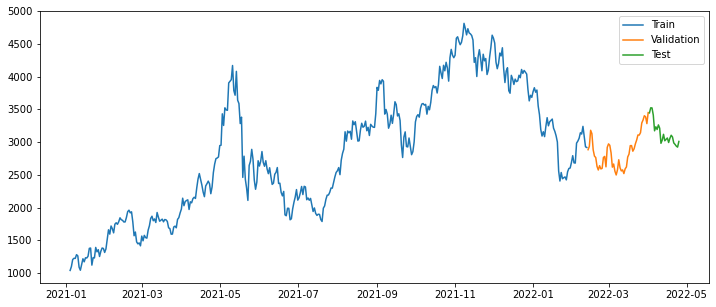

In [18]:
#Partition for train, validation and test

q_80 = int(len(dates) * .85)
q_90 = int(len(dates) * .95)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

fig,axs = plt.subplots(1, 1, figsize=(12,5))

#Plot the partitions
axs.plot(dates_train, y_train)
axs.plot(dates_val, y_val)
axs.plot(dates_test, y_test)

axs.legend(['Train', 'Validation', 'Test'])

fig.savefig('../analysis/'+coin_name +'_partition'+'.png')

## <font color='#5D6D7E'>Get Best Parameters for LSTM</font> <a class="anchor" id="twentythird-bullet"></a>
  [Back to TOC](#toc)

In [19]:
#!pip install tensorflow

In [20]:
#import os
#os.environ['PYTHONHASHSEED']= '0'
#import numpy as np
#np.random.seed(1)
#import random as rn
#rn.seed(1)
#import tensorflow as tf
#tf.random.set_seed(1)
#
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras import layers
#from sklearn.metrics import mean_squared_error
#
## Function to create LSTM model and compute the MSE value for the given parameters
#def check_model(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate,epoch,batch):
#    
#    # create model
#    model = Sequential([layers.Input((3, 1)),
#                        layers.LSTM(64),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(1)])
#    # Compile model
#    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mean_absolute_error'])
#    
#    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, shuffle=False, batch_size=batch, verbose=2)
#    
#    test_predictions = model.predict(X_test).flatten()
#    
#    LSTM_mse = mean_squared_error(y_test, test_predictions)
#    
#    return LSTM_mse
#
##Function that iterates the different parameters and gets the ones corresponding to the lowest MSE score.
#def search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test):
#    
#    best_score = float('inf')
#    
#    for b in batch_size:
#        for e in epochs:
#            for l in learn_rate:
#                print('Batch Size: ' + str(b))
#                print('Number of Epochs: ' + str(e))
#                print('Value of Learning Rate: ' + str(l))
#                try:
#                    mse = check_model(X_train, y_train, X_val, y_val, X_test, y_test,l,e,b)
#                    print('MSE=%.3f' % (mse))
#                    if mse < best_score:
#                        best_score = mse
#                        top_params = [b, e, l]
#                except:
#                    continue
#                    
#    print('Best MSE=%.3f' % (best_score))
#    print('Optimal Batch Size: ' + str(top_params[0]))
#    print('Optimal Number of Epochs: ' + str(top_params[1]))
#    print('Optimal Value of Learning Rate: ' + str(top_params[2]))
#                        
#
## define parameters
#batch_size = [10, 100, 1000]
#epochs = [50, 100]
#learn_rate = np.linspace(0.001,0.1, num=10)
#
#warnings.filterwarnings("ignore")
#search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test)

## <font color='#5D6D7E'>Run the LSTM Model and Get Predictions</font> <a class="anchor" id="twentyfourth-bullet"></a>
  [Back to TOC](#toc)

In [21]:
#BEST SOLUTION OF THE MODEL

# MSE=66761.977
# Batch Size: 1000
# Number of Epochs: 50
# Value of Learning Rate: 0.067
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.067),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, shuffle=False, batch_size=1000, verbose=2)

Epoch 1/50
1/1 - 1s - loss: 8886416.0000 - mean_absolute_error: 2819.8667 - val_loss: 8241233.5000 - val_mean_absolute_error: 2858.7683 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 8877124.0000 - mean_absolute_error: 2818.2185 - val_loss: 8221966.0000 - val_mean_absolute_error: 2855.3962 - 21ms/epoch - 21ms/step
Epoch 3/50
1/1 - 0s - loss: 8858130.0000 - mean_absolute_error: 2814.8469 - val_loss: 8185552.0000 - val_mean_absolute_error: 2849.0127 - 20ms/epoch - 20ms/step
Epoch 4/50
1/1 - 0s - loss: 8822240.0000 - mean_absolute_error: 2808.4658 - val_loss: 8128282.5000 - val_mean_absolute_error: 2838.9443 - 20ms/epoch - 20ms/step
Epoch 5/50
1/1 - 0s - loss: 8765781.0000 - mean_absolute_error: 2798.3950 - val_loss: 8043616.0000 - val_mean_absolute_error: 2823.9932 - 19ms/epoch - 19ms/step
Epoch 6/50
1/1 - 0s - loss: 8682327.0000 - mean_absolute_error: 2783.4436 - val_loss: 7925452.0000 - val_mean_absolute_error: 2802.9934 - 21ms/epoch - 21ms/step
Epoch 7/50
1/1 - 0s - loss: 8565866.00

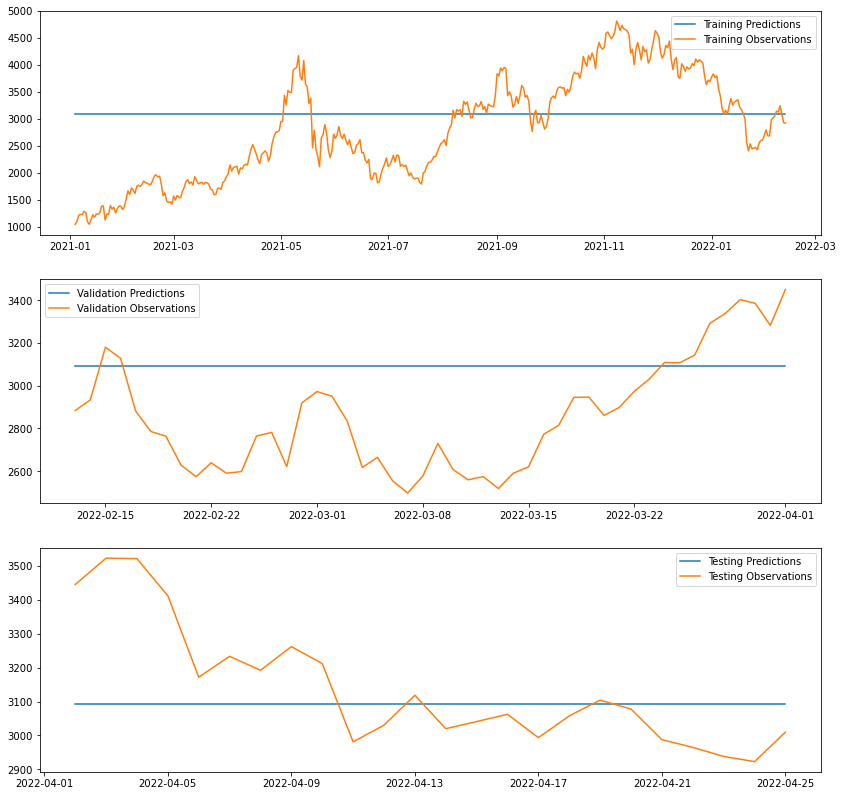

In [22]:
#PREDICT THE VALUES USING THE MODEL
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()


fig,axs = plt.subplots(3, 1, figsize=(14,14))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].legend(['Training Predictions', 'Training Observations'])

axs[1].plot(dates_val, val_predictions)
axs[1].plot(dates_val, y_val)
axs[1].legend(['Validation Predictions', 'Validation Observations'])

axs[2].plot(dates_test, test_predictions)
axs[2].plot(dates_test, y_test)
axs[2].legend(['Testing Predictions', 'Testing Observations'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_modelPredictions'+'.png')

## <font color='#5D6D7E'>Recursive Predictions</font> <a class="anchor" id="twentysixth-bullet"></a>
  [Back to TOC](#toc)

In [23]:
from copy import deepcopy

#Get prediction for future dates recursively based on the previous existing information. Then update the window of days upon
#which the predictions are made

recursive_predictions = []
recursive_dates = np.concatenate([dates_test])

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.insert(last_window,0,next_prediction)[:-1]
    

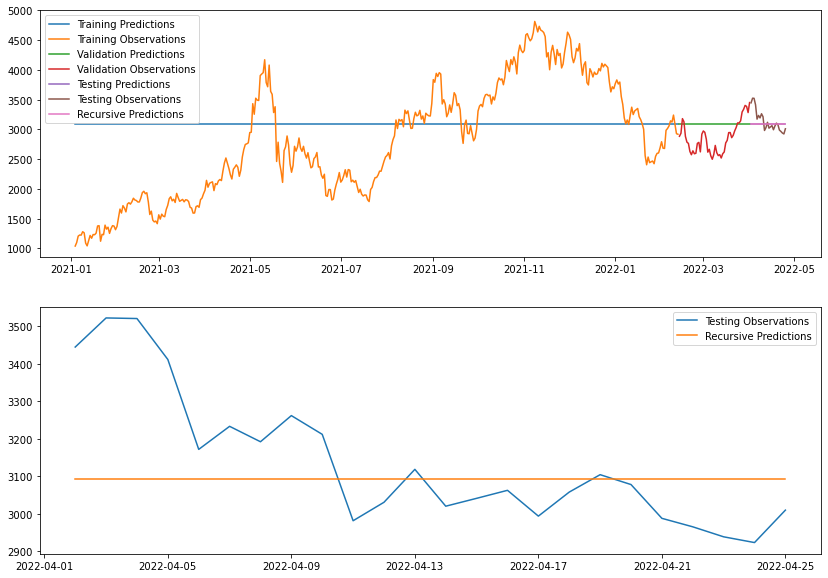

In [24]:
fig,axs = plt.subplots(2, 1, figsize=(14,10))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].plot(dates_val, val_predictions)
axs[0].plot(dates_val, y_val)
axs[0].plot(dates_test, test_predictions)
axs[0].plot(dates_test, y_test)
axs[0].plot(recursive_dates, recursive_predictions)
axs[0].legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

axs[1].plot(dates_test, y_test)
axs[1].plot(recursive_dates, recursive_predictions)
axs[1].legend(['Testing Observations',
              'Recursive Predictions'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_recursivePredictions'+'.png')

In [25]:
may_10_prediction = coin_name +'-USD',recursive_predictions[-2][0]
may_10_prediction

('ETH-USD', 3091.7747)